# Author : Youssef Ali Manaa
## Importing libraries and loading the data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import missingno as msno

In [2]:
df =pd.read_csv("hotel_bookings.csv")

# Phase 1: Exploratory Data Analysis (EDA) & Data Quality Report

In [3]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [4]:
df.shape

(119390, 32)

In [5]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

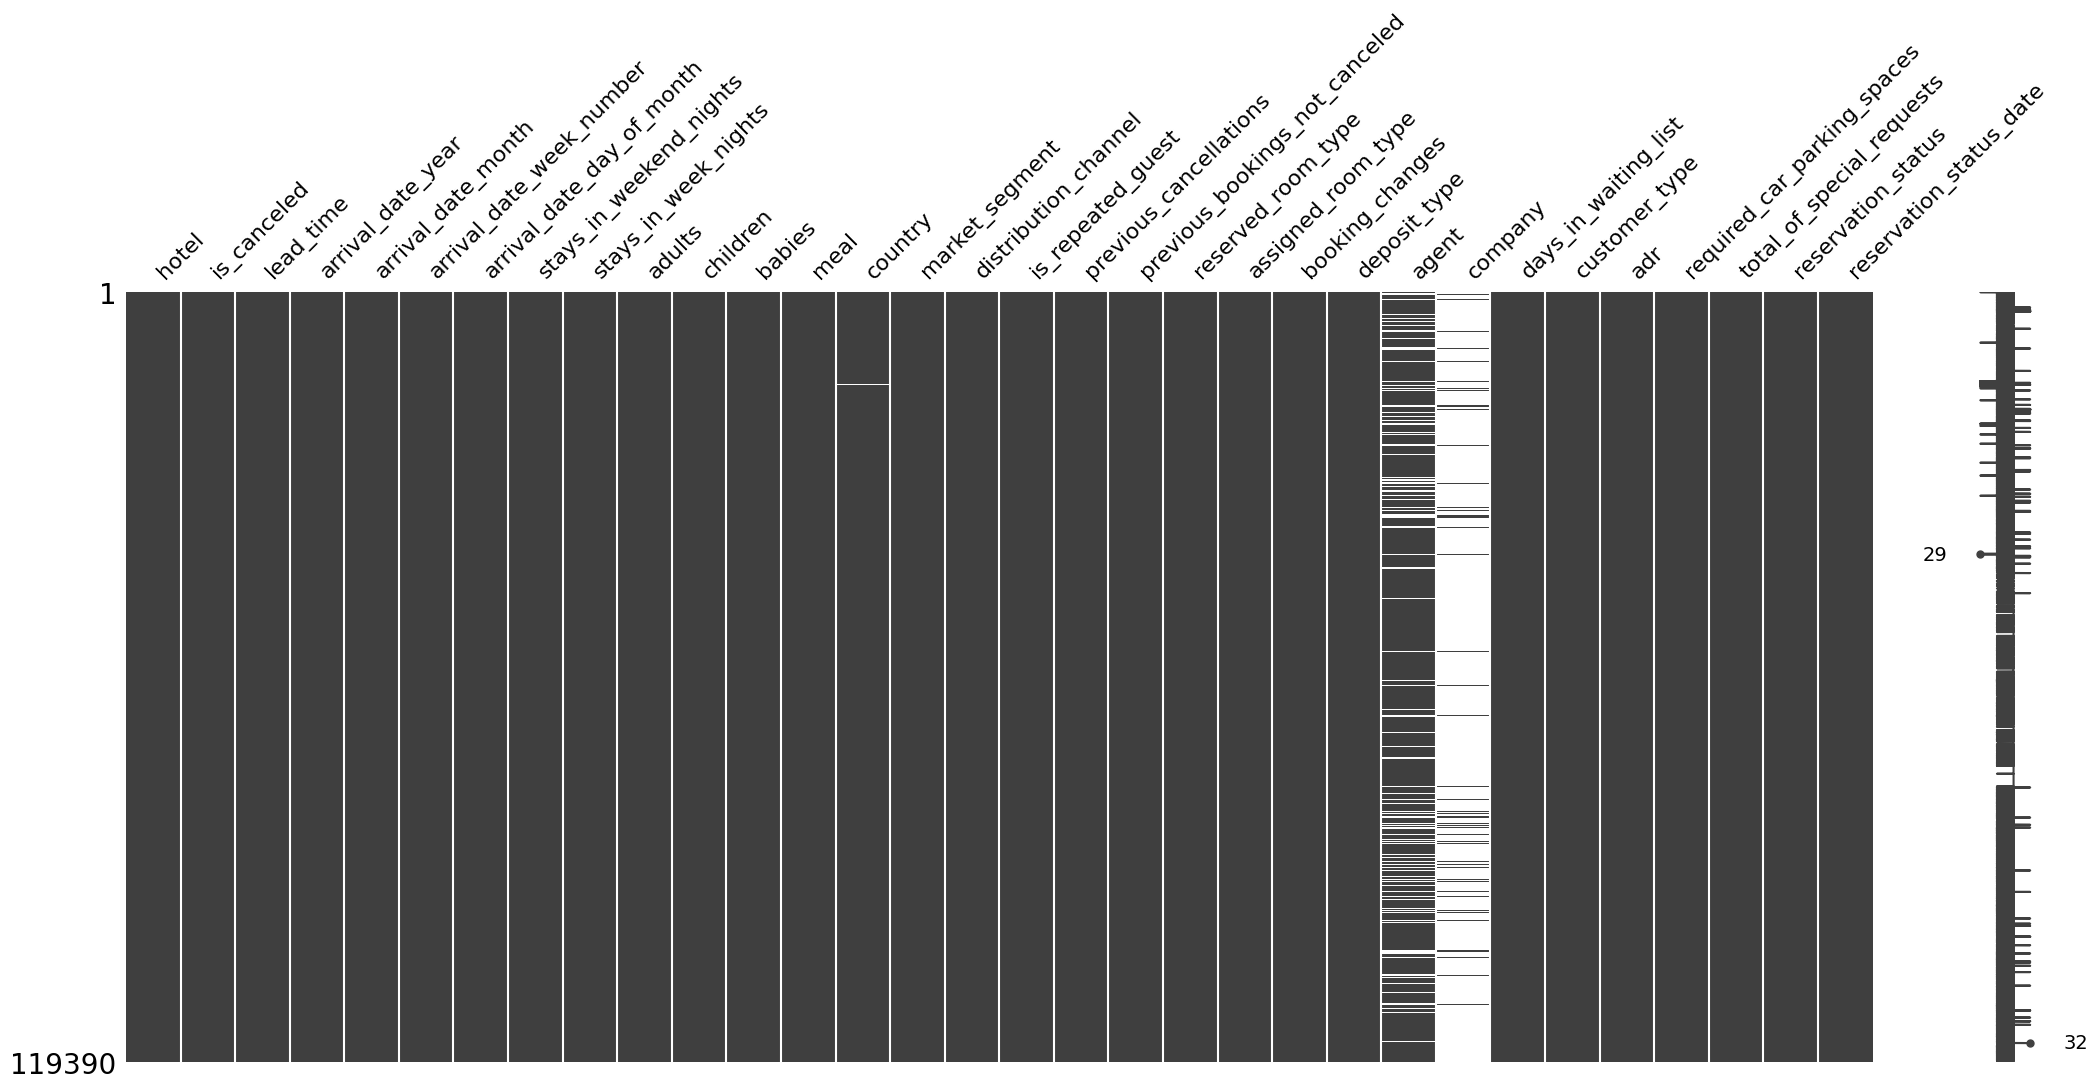

In [7]:
msno.matrix(df)
plt.show()

<Axes: >

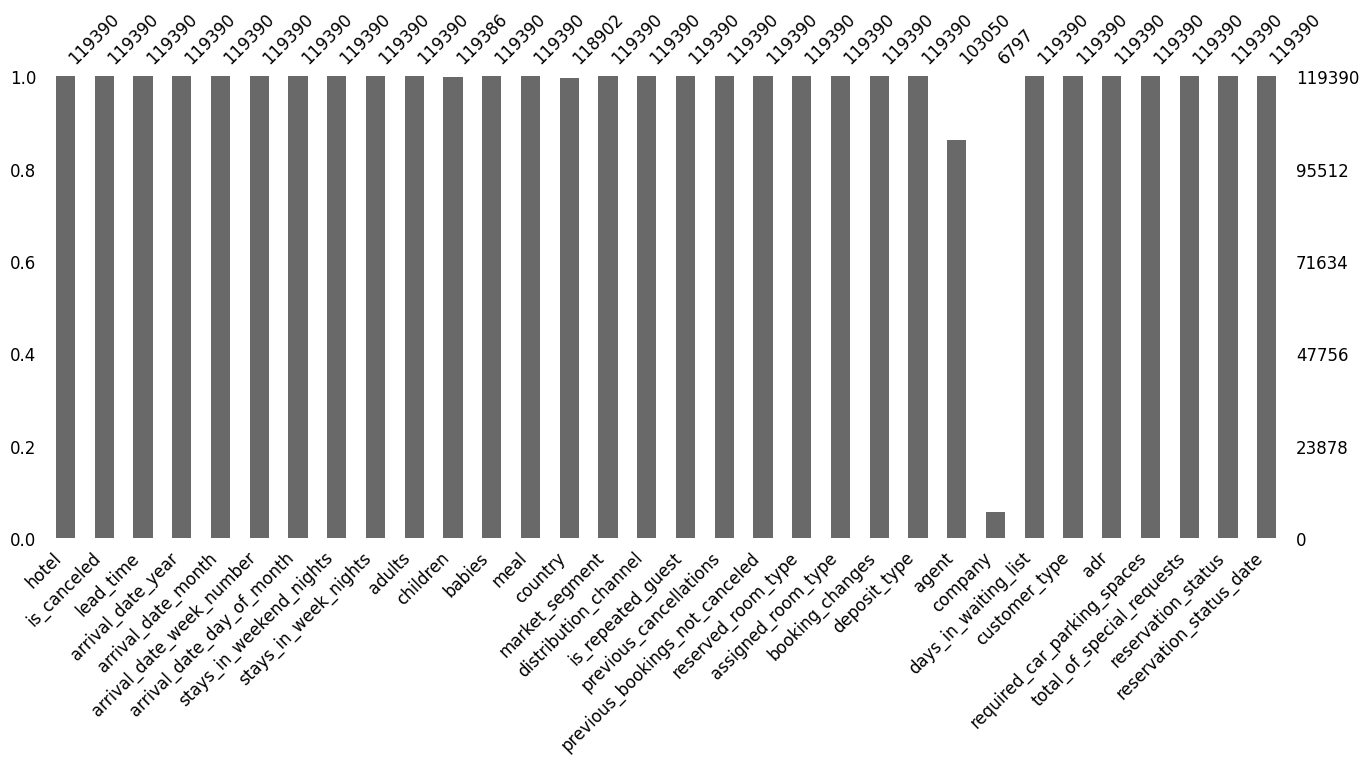

In [8]:
msno.bar(df, figsize=(16,6),  fontsize=12)

In [9]:
null_counts = df.isnull().sum()
null_df = pd.DataFrame(null_counts,columns= ['Missing_Values']).reset_index().rename(columns={'index':'Column'})
null_df = null_df.sort_values(by='Missing_Values',ascending = False).reset_index()[:4]
null_df

,index,Column,Missing_Values
0,24,company,112593
1,23,agent,16340
2,13,country,488
3,10,children,4


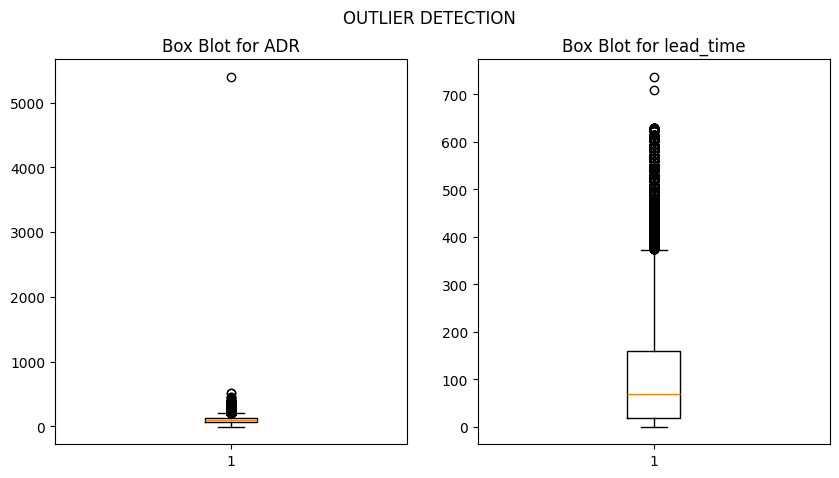

In [10]:
fig,ax = plt.subplots(1,2,figsize=(10,5))
fig.suptitle("OUTLIER DETECTION")
ax[0].boxplot(x=df['adr'])
ax[0].set_title("Box Blot for ADR")
ax[1].boxplot(x=df['lead_time'])
ax[1].set_title("Box Blot for lead_time")
plt.show()

In [11]:
Q1= df['adr'].quantile(0.25)
Q3= df['adr'].quantile(0.75)
IQR = Q3-Q1
Outliers = df[(df['adr'] < Q1 -1.5*IQR) | (df['adr'] > Q3 + 1.5 * IQR)]
print("Number of outliers in adr equals: ",len(Outliers))

Number of outliers in adr equals:  3793


In [12]:
Q1 = df['lead_time'].quantile(0.25)
Q3 = df['lead_time'].quantile(0.75)
IQR = Q3 - Q1
Outliers = df[(df['lead_time'] < Q1 - 1.5 * IQR) | (df['lead_time'] > Q3 + 1.5 * IQR)]
print ("Number of outliers in lead_time equals:",len(Outliers))

Number of outliers in lead_time equals: 3005


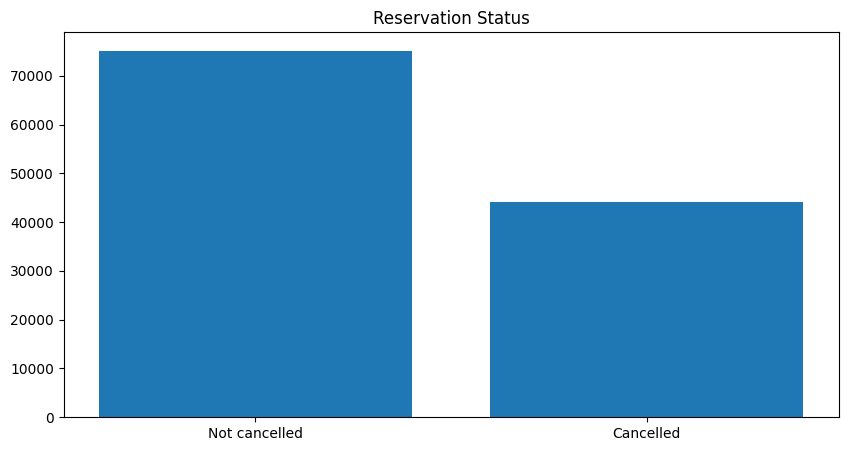

In [13]:
plt.figure(figsize=(10,5))
plt.title("Reservation Status")
plt.bar(['Not cancelled' , 'Cancelled'],df['is_canceled'].value_counts())
plt.show()

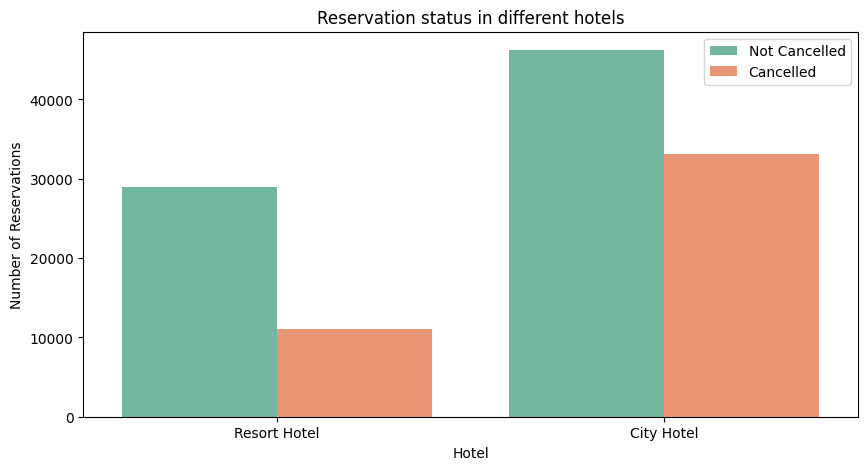

In [14]:
plt.figure(figsize=(10,5))
sns.countplot(x='hotel',hue='is_canceled', data = df , palette = "Set2")
plt.title('Reservation status in different hotels')
plt.xlabel('Hotel')
plt.ylabel('Number of Reservations')
plt.legend(['Not Cancelled', 'Cancelled'])
plt.show()

C:\Users\Mana3\AppData\Local\Temp\ipykernel_7024\429053626.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(top_cancelled_countries , palette='magma')


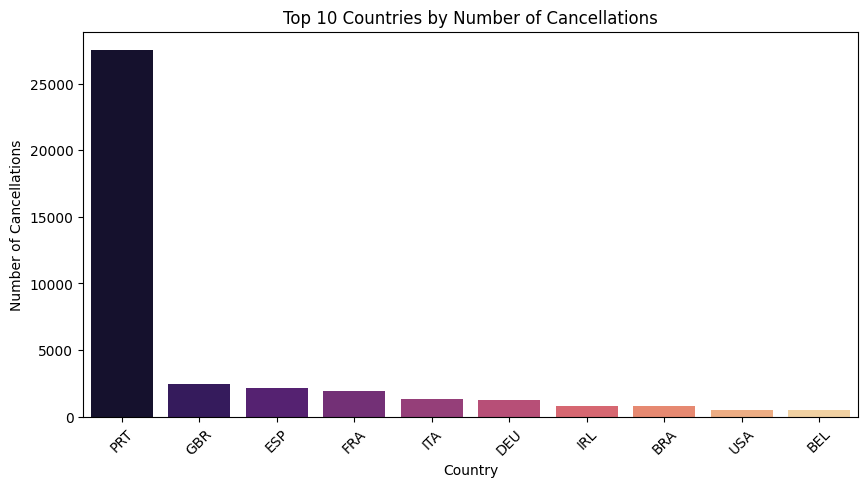

In [15]:
top_cancelled_countries = df[df['is_canceled']==1]['country'].value_counts().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(top_cancelled_countries , palette='magma')
plt.title("Top 10 Countries by Number of Cancellations")
plt.xlabel("Country")
plt.ylabel("Number of Cancellations")
plt.xticks(rotation=45)
plt.show()

In [16]:
cancelled_data= df[df['is_canceled']==1]
cancelled_df_adr= cancelled_data.groupby('reservation_status_date')[['adr']].mean()
cancelled_df_adr.reset_index(inplace=True)
cancelled_df_adr.sort_values('reservation_status_date', inplace=True)
not_cancelled_data=df[df['is_canceled']==0]
not_cancelled_df_adr= not_cancelled_data.groupby('reservation_status_date')[['adr']].mean()
not_cancelled_df_adr.reset_index(inplace=True)
not_cancelled_df_adr.sort_values('reservation_status_date', inplace=True)

In [17]:
cancelled_df_adr = cancelled_df_adr[(cancelled_df_adr['reservation_status_date']>'2016') & (cancelled_df_adr['reservation_status_date']<'2017-09')]
not_cancelled_df_adr = not_cancelled_df_adr[(not_cancelled_df_adr['reservation_status_date']>'2016') & (not_cancelled_df_adr['reservation_status_date']<'2017-09')]

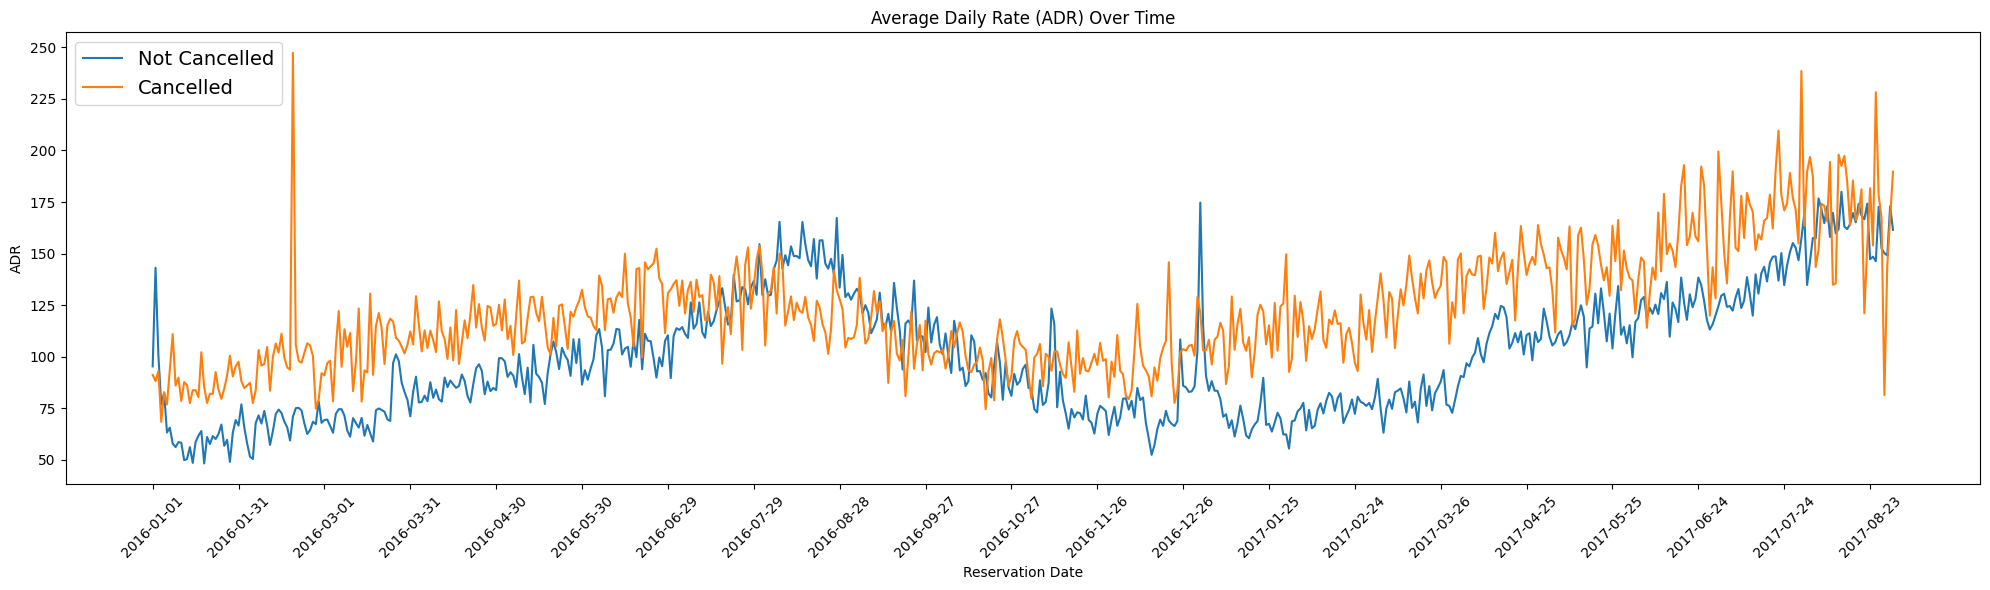

In [18]:
plt.figure(figsize=(20,6))
plt.title('Average Daily Rate (ADR) Over Time')
plt.plot(not_cancelled_df_adr['reservation_status_date'], not_cancelled_df_adr['adr'], label='Not Cancelled')
plt.plot(cancelled_df_adr['reservation_status_date'], cancelled_df_adr['adr'], label='Cancelled')
plt.xticks(ticks=plt.xticks()[0][::30], rotation=45)  
plt.ylabel("ADR")
plt.xlabel("Reservation Date")
plt.legend(fontsize=14)
plt.tight_layout()
plt.show()


## Key Fingings :
- There are 4 Columns with missing values which are : `company`, `agent`, `country`, and `children`
- "adr" Column has 3793 Outliers
- "lead_time" Column has 3005 Outliers
- In comparison to resort hotels, city hotels have more bookings. Its possible that resort hotels are more expensive that those in cities.
- Reservations are canceled when the average daily rate is higher than when it is not canceled.
- portugal is top country in cancellation 

# Phase 2: Data Cleaning (The Core of the Project)


A) Handling Missing Values

In [19]:
null_df['Percentage Of missing values'] = null_df['Missing_Values'] / len(df) * 100
null_df

,index,Column,Missing_Values,Percentage Of missing values
0,24,company,112593,94.306893
1,23,agent,16340,13.686238
2,13,country,488,0.408744
3,10,children,4,0.003350


In [20]:
df['company'] = df['company'].fillna(0)

In [21]:
df['agent'] = df['agent'].fillna(0)

In [22]:
df['country'] = df['country'].fillna(df['country'].mode()[0])

In [23]:
df['children'] = df['children'].fillna(df['children'].median())

In [24]:
df.drop_duplicates(inplace=True)

In [25]:
len(df)

87377

In [26]:
df[df['adr'] > 1000] = 1000

In [27]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'], infer_datetime_format= True ,format= 'mixed')

C:\Users\Mana3\AppData\Local\Temp\ipykernel_7024\3295646189.py:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'], infer_datetime_format= True ,format= 'mixed')


In [28]:
df['reservation_status_date']

0        2015-07-01
1        2015-07-01
2        2015-07-02
3        2015-07-02
4        2015-07-03
            ...    
119385   2017-09-06
119386   2017-09-07
119387   2017-09-07
119388   2017-09-07
119389   2017-09-07
Name: reservation_status_date, Length: 87377, dtype: datetime64[ns]

### Cleaning Summary:
- Company & Agent: filled with 0.
- Country: imputed with mode.
- Children: imputed with median.
- Duplicates removed.
- ADR capped at 1000.
- Dates converted to datetime format.

# Phase 3: Feature Engineering & Preprocessing


In [29]:
df['total_guests'] = df['adults'] + df['children'] + df['babies']
df['total_nights'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']
df['is_family'] = np.where(df['children'] + df['babies'] > 0, 1, 0)

In [30]:
dropped_cols = ['adults','children','babies','stays_in_weekend_nights','stays_in_week_nights','reservation_status',
                'reservation_status_date']
df.drop(dropped_cols,axis = 1 , inplace=True)


In [31]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,meal,country,market_segment,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,total_guests,total_nights,is_family
0,Resort Hotel,0,342,2015,July,27,1,BB,PRT,Direct,...,0.0,0.0,0,Transient,0.0,0,0,2.0,0,0
1,Resort Hotel,0,737,2015,July,27,1,BB,PRT,Direct,...,0.0,0.0,0,Transient,0.0,0,0,2.0,0,0
2,Resort Hotel,0,7,2015,July,27,1,BB,GBR,Direct,...,0.0,0.0,0,Transient,75.0,0,0,1.0,1,0
3,Resort Hotel,0,13,2015,July,27,1,BB,GBR,Corporate,...,304.0,0.0,0,Transient,75.0,0,0,1.0,1,0
4,Resort Hotel,0,14,2015,July,27,1,BB,GBR,Online TA,...,240.0,0.0,0,Transient,98.0,0,1,2.0,2,0


In [32]:
categorical_cols = [ x for x in df.columns if df[x].dtype=='object']
categorical_cols

['hotel',
 'arrival_date_month',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'deposit_type',
 'customer_type']

In [33]:
numerical_cols = [x for x in df.columns if df[x].dtype =='int64' or df[x].dtype == 'float64' ]
numerical_cols

['is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'agent',
 'company',
 'days_in_waiting_list',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'total_guests',
 'total_nights',
 'is_family']

In [34]:
df[categorical_cols].nunique().sort_values(ascending = False)

country                 178
arrival_date_month       13
assigned_room_type       13
reserved_room_type       11
market_segment            9
distribution_channel      6
meal                      6
customer_type             5
deposit_type              4
hotel                     3
dtype: int64

In [35]:
low_cardinality = ['hotel','deposit_type','customer_type','meal','distribution_channel']
high_cardinality = [ x for x in categorical_cols if x not in low_cardinality]

In [36]:
df = pd.get_dummies(df,columns=low_cardinality , drop_first= True)

In [37]:
for x in high_cardinality:
    col_name = ""
    count = df[x].value_counts().to_dict()
    col_name = x+ "_freq"
    df[col_name] = df[x].map(count)
    df.drop(x,axis=1,inplace=True)

In [38]:
df.head()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,...,distribution_channel_Corporate,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,distribution_channel_Undefined,arrival_date_month_freq,country_freq,market_segment_freq,reserved_room_type_freq,assigned_room_type_freq
0,0,342,2015,27,1,0,0,0,3,0.0,...,False,True,False,False,False,10056,27885,11798,915,2165
1,0,737,2015,27,1,0,0,0,4,0.0,...,False,True,False,False,False,10056,27885,11798,915,2165
2,0,7,2015,27,1,0,0,0,0,0.0,...,False,True,False,False,False,10056,10433,11798,56535,2165
3,0,13,2015,27,1,0,0,0,0,304.0,...,True,False,False,False,False,10056,10433,4206,56535,46304
4,0,14,2015,27,1,0,0,0,0,240.0,...,False,False,False,True,False,10056,10433,51616,56535,46304


In [39]:
from sklearn.model_selection import train_test_split

In [40]:
train,test = train_test_split(df ,test_size= 0.2, random_state= 42 )

In [41]:
print("Train shape:", train.shape)
print("Test shape:", test.shape)

Train shape: (69901, 42)
Test shape: (17476, 42)


### Final Preparation:
- New features engineered: `total_guests`, `total_nights`, `is_family`.
- One-hot encoding applied to categorical features with low_cardinality.
- Rest of categorical features with high_cardinality encoded with frequency.
- Leakage features removed.
- Dataset split into train and test sets.

# Conclusion

- The dataset is now **clean, consistent, and machine-learning ready**.
- All major data quality issues (missing values, outliers, duplicates, data types) have been handled.
- Feature engineering and encoding completed.
- Ready for model training phase.
